# 📩 Classificação de Mensagens de SMS como Spam ou Ham com Naïve Bayes Bernoulli

## 📌 Sobre o Dataset SMS Spam Collection
O **SMS Spam Collection** é um dataset amplamente utilizado para problemas de **classificação de texto**. Ele contém mensagens de SMS classificadas como:

- 📬 **Ham** → Mensagens normais, sem conteúdo indesejado.  
- 🚨 **Spam** → Mensagens indesejadas, geralmente contendo propagandas ou fraudes.  

### **📊 Estrutura do Dataset**
O dataset contém **duas colunas**:
1. **`label`** → Tipo da mensagem (spam ou ham).  
2. **`message`** → O texto da mensagem.  

📌 **Exemplo de algumas linhas do dataset:**

| label | message |
|-------|---------|
| ham | "Oi, como você está?" |
| spam | "Parabéns! Você ganhou um iPhone, clique aqui para resgatar." |
| ham | "Me liga quando puder." |
| spam | "Oferta imperdível! Compre agora e ganhe 50% de desconto!" |

O objetivo do modelo é classificar automaticamente se uma nova mensagem é **spam** ou **ham** com base no aprendizado dos dados históricos.

---

## 🚀 O que o código faz?
Este código implementa um modelo **Naïve Bayes Bernoulli** para detectar **spam em mensagens de texto**.  

🔹 **Carrega os dados do dataset SMS Spam Collection**  
🔹 **Remove possíveis valores ausentes**  
🔹 **Transforma os textos das mensagens em uma matriz binária** (presença/ausência de palavras)  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Treina um modelo Naïve Bayes Bernoulli** para classificação  
🔹 **Avalia o modelo** com métricas como acurácia, relatório de classificação e matriz de confusão  

---

## 🛠️ Como funciona o código?
O código foi modularizado para maior organização e reutilização:

1️⃣ **`carregar_dataset()`** → Carrega e exibe informações do dataset  
2️⃣ **`visualizar_distribuicao(df)`** → Exibe um gráfico mostrando a distribuição de spam e ham  
3️⃣ **`preprocessamento(df)`** → Converte os textos em uma matriz binária (usando `CountVectorizer`)  
4️⃣ **`dividir_dados(X, y)`** → Divide os dados em treino e teste  
5️⃣ **`treinar_naive_bayes(X_train, y_train)`** → Treina o modelo Naïve Bayes Bernoulli  
6️⃣ **`avaliar_modelo(modelo, X_test, y_test)`** → Avalia o desempenho do modelo  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:  

✔ **Acurácia** do modelo  
✔ **Relatório de classificação** (Precisão, Recall, F1-Score)  
✔ **Matriz de confusão** visualizada com `seaborn`  

📌 *Matriz de Confusão Gerada:*  
🟠 Laranja = Classificações corretas  
⚪ Branco = Erros do modelo  

---

## 🔧 Requisitos
Antes de rodar o código, certifique-se de ter as bibliotecas instaladas:

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Informações gerais do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None 

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro... 



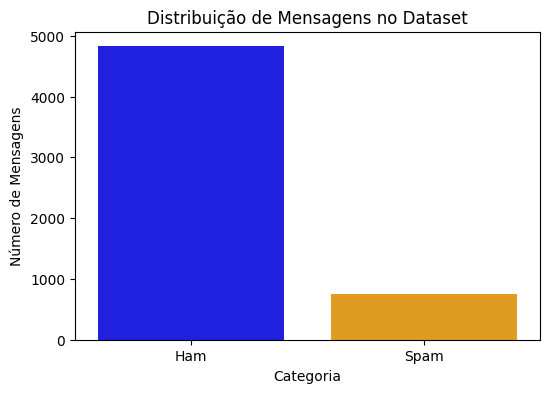

✅ Acurácia do modelo: 0.98

📊 Relatório de Classificação:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.98      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



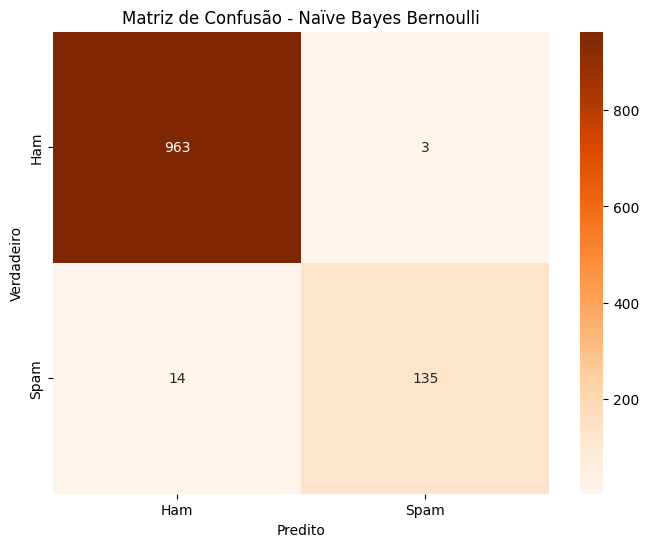

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 🔹 Função para carregar e visualizar o dataset de SMS Spam
def carregar_dataset():
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
    
    # Convertendo os rótulos para binário (0 = Ham, 1 = Spam)
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    
    # Removendo linhas com valores ausentes, se houver
    df.dropna(inplace=True)
    
    print("📌 Informações gerais do dataset:\n")
    print(df.info(), "\n")
    print(df.head(), "\n")
    
    return df

# 🔹 Função para visualizar a distribuição das classes
def visualizar_distribuicao(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x=df['label'], palette=['blue', 'orange'])
    plt.xticks([0, 1], labels=['Ham', 'Spam'])
    plt.xlabel("Categoria")
    plt.ylabel("Número de Mensagens")
    plt.title("Distribuição de Mensagens no Dataset")
    plt.show()

# 🔹 Função para processar os dados (transformação de texto em matriz binária)
def preprocessamento(df):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(df['message'])
    y = df['label']
    return X, y, vectorizer

# 🔹 Função para dividir os dados em treino e teste
def dividir_dados(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# 🔹 Função para treinar o modelo Naïve Bayes Bernoulli
def treinar_naive_bayes(X_train, y_train):
    modelo = BernoulliNB()
    modelo.fit(X_train, y_train)
    return modelo

# 🔹 Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    
    # Exibindo métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo: {accuracy:.2f}\n")
    
    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Naïve Bayes Bernoulli")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    df = carregar_dataset()
    
    # Visualizando a distribuição de spam e ham
    visualizar_distribuicao(df)
    
    # Processamento dos dados
    X, y, vectorizer = preprocessamento(df)
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = dividir_dados(X, y)
    
    # Treinando o modelo
    modelo_naive_bayes = treinar_naive_bayes(X_train, y_train)
    
    # Avaliando o modelo
    avaliar_modelo(modelo_naive_bayes, X_test, y_test)
